In [1]:
import torch
from torch.nn import Linear, Module, MSELoss
from torch.optim import SGD
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
torch.__version__

'1.4.0+cpu'

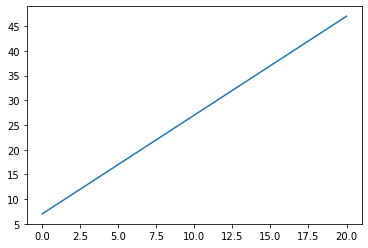

In [2]:
x = np.linspace(0,20,500)
y = 2*x + 7
plt.plot(x,y)

In [7]:
x = np.random.rand(256)
noise = np.random.randn(256) / 6
y = x * 2 + 7 + noise
df = pd.DataFrame()
df['x'] = x
df['y'] = y

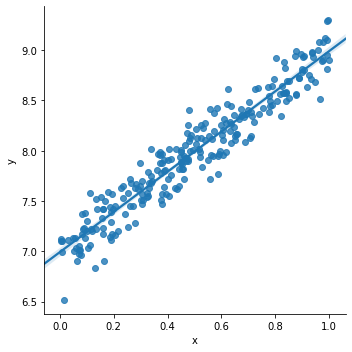

In [8]:
sns.lmplot(x='x',y='y',data=df);

In [10]:
model=Linear(1,1)

In [11]:
criterion = MSELoss()

In [12]:
optim = SGD(model.parameters(),lr = 0.01)
#model.parameters() 获取网络参数

In [22]:
epochs = 5000
#训练3000次

In [23]:
x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')
#x_train, y_train 的形状是 (256, 1),mini-batch的大小为256
#feature为1

In [24]:
for i in range(epochs):
    # 整理输入和输出的数据，这里输入和输出一定要是torch的Tensor类型
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)
    #使用模型进行预测,model=Linear(1,1)
    outputs = model(inputs)
    #梯度为0，否则会叠加
    optim.zero_grad()
    #计算损失,criterion = MSELoss()
    loss = criterion(outputs,labels)
    #反向传播
    loss.backward()
    #使用优化器默认方法优化
    optim.step()
    if(i%100==0):
        #每训练一百次，输出损失函数，看效果
        print('epoch {}, loss {:1.4f}'.format(i,loss.data.item()))   
    #loss在逐行减小！！

epoch 0, loss 0.0271
epoch 100, loss 0.0271
epoch 200, loss 0.0271
epoch 300, loss 0.0271
epoch 400, loss 0.0271
epoch 500, loss 0.0271
epoch 600, loss 0.0271
epoch 700, loss 0.0271
epoch 800, loss 0.0271
epoch 900, loss 0.0271
epoch 1000, loss 0.0271
epoch 1100, loss 0.0271
epoch 1200, loss 0.0271
epoch 1300, loss 0.0271
epoch 1400, loss 0.0271
epoch 1500, loss 0.0271
epoch 1600, loss 0.0271
epoch 1700, loss 0.0271
epoch 1800, loss 0.0271
epoch 1900, loss 0.0271
epoch 2000, loss 0.0271
epoch 2100, loss 0.0271
epoch 2200, loss 0.0271
epoch 2300, loss 0.0271
epoch 2400, loss 0.0271
epoch 2500, loss 0.0271
epoch 2600, loss 0.0271
epoch 2700, loss 0.0271
epoch 2800, loss 0.0271
epoch 2900, loss 0.0271
epoch 3000, loss 0.0271
epoch 3100, loss 0.0271
epoch 3200, loss 0.0271
epoch 3300, loss 0.0271
epoch 3400, loss 0.0271
epoch 3500, loss 0.0271
epoch 3600, loss 0.0271
epoch 3700, loss 0.0271
epoch 3800, loss 0.0271
epoch 3900, loss 0.0271
epoch 4000, loss 0.0271
epoch 4100, loss 0.0271
epoc

In [25]:
#训练好了一维线性回归方程式，可以用model.parameters() 提取模型参数
#期待的回归是，w=2，b=7
[w,b] = model.parameters()
print (w.item(),b.item())

#还是挺接近的了,训练越多，越接近

1.9981619119644165 6.992232799530029


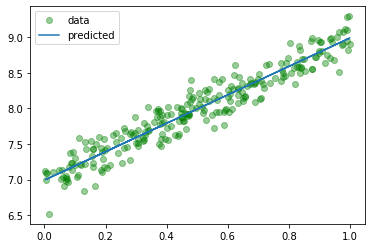

In [38]:
predicted = model.forward(torch.from_numpy(x_train)).data.numpy()
plt.plot(x_train, y_train, 'go', label = 'data', alpha = 0.4)
plt.plot(x_train, predicted, label = 'predicted', alpha = 1)
plt.legend()
plt.show()
#alpha—透明度

In [30]:
#可计算出偏差
print(2-w.data.item(),7-b.data.item())

0.001838088035583496 0.007767200469970703
